***This is a notebook to test different CV methods for feature extraction, and choosing one that creates a best signature of the dish***

In [3]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


**Color Histogram**

In [4]:
# load different dishes from a file and print them out


images = []
cucumber_images = []
tomato_images = []
purple_rice_images = []
little_greens_images = []
shrimp_ball_images = []

cucumber_path = 'images/categorized_dishes/cucumber_egg'
tomato_path = 'images/categorized_dishes/tomato_egg'
purple_rice = 'images/categorized_dishes/purple_rice'
little_greens = 'images/categorized_dishes/little_greens'
shrimp_ball = 'images/categorized_dishes/shrimp_ball'


# load five random images from each folder
for i in range(5):
    cucumber_image = cv2.imread(os.path.join(cucumber_path, os.listdir(cucumber_path)[i]))
    tomato_image = cv2.imread(os.path.join(tomato_path, os.listdir(tomato_path)[i]))
    purple_rice_image = cv2.imread(os.path.join(purple_rice, os.listdir(purple_rice)[i]))
    little_greens_image = cv2.imread(os.path.join(little_greens, os.listdir(little_greens)[i]))
    shrimp_ball_image = cv2.imread(os.path.join(shrimp_ball, os.listdir(shrimp_ball)[i]))

    cucumber_images.append(cucumber_image)
    tomato_images.append(tomato_image)
    purple_rice_images.append(purple_rice_image)
    little_greens_images.append(little_greens_image)
    shrimp_ball_images.append(shrimp_ball_image)

images.append(cucumber_images)
images.append(tomato_images)
images.append(purple_rice_images)
images.append(little_greens_images)
images.append(shrimp_ball_images)

# convert to float and rescale to 0-1
for i in range(5):
    images[0][i] = images[0][i].astype(np.float32) / 255.0
    images[1][i] = images[1][i].astype(np.float32) / 255.0
    images[2][i] = images[2][i].astype(np.float32) / 255.0
    images[3][i] = images[3][i].astype(np.float32) / 255.0
    images[4][i] = images[4][i].astype(np.float32) / 255.0



AttributeError: 'NoneType' object has no attribute 'astype'

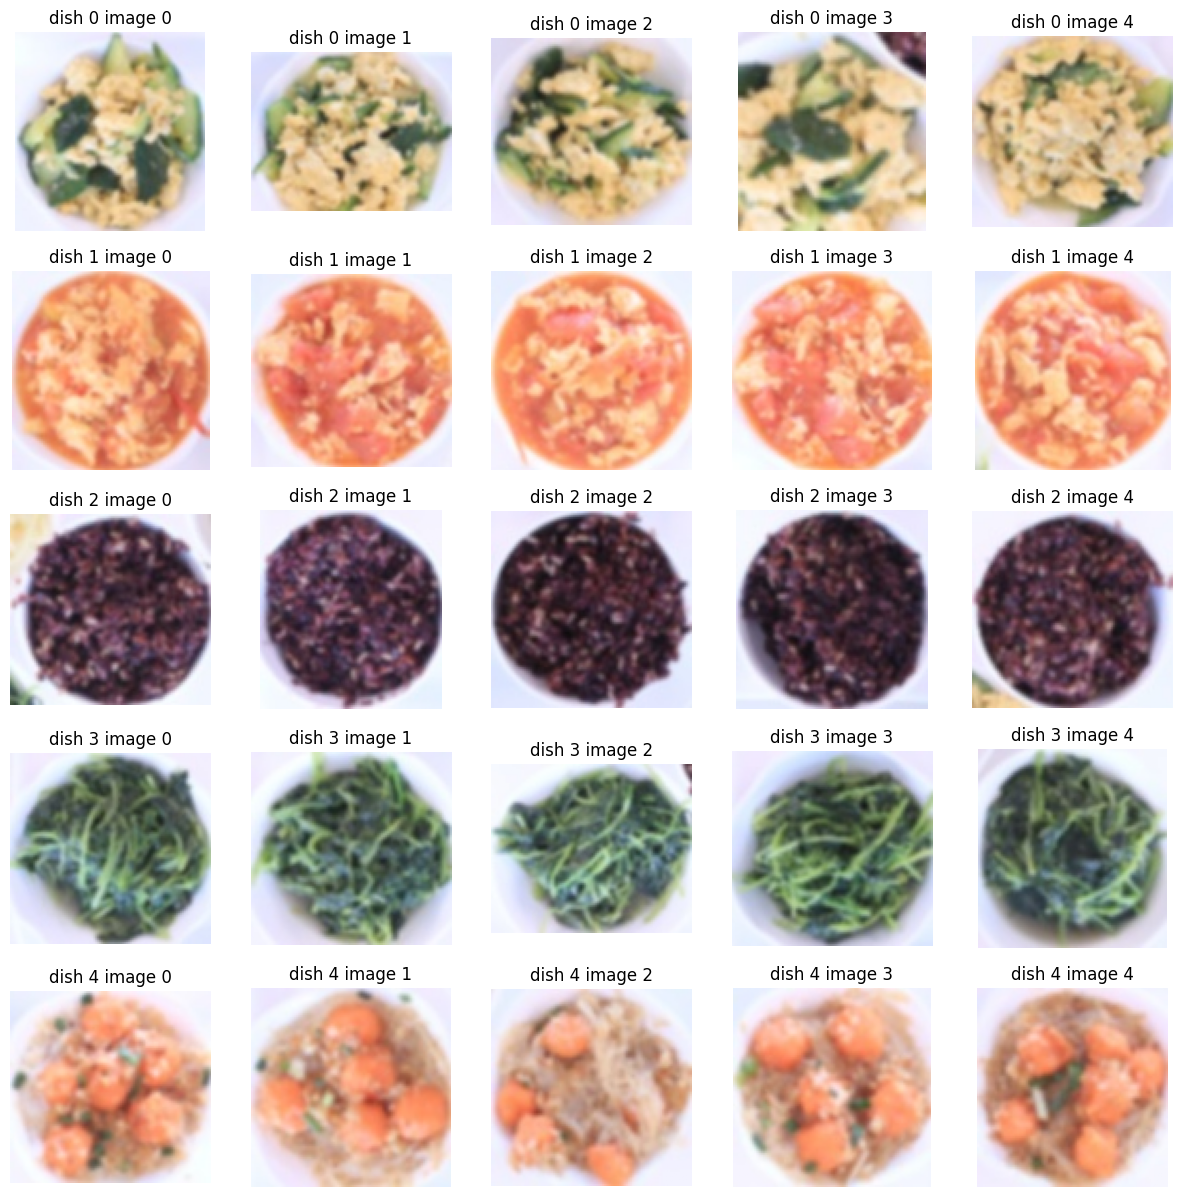

In [ ]:
# show the images
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(cv2.cvtColor(images[i][j], cv2.COLOR_BGR2RGB))
        ax[i, j].axis('off')
        ax[i, j].set_title('dish ' + str(i) + ' image ' + str(j))
plt.show()


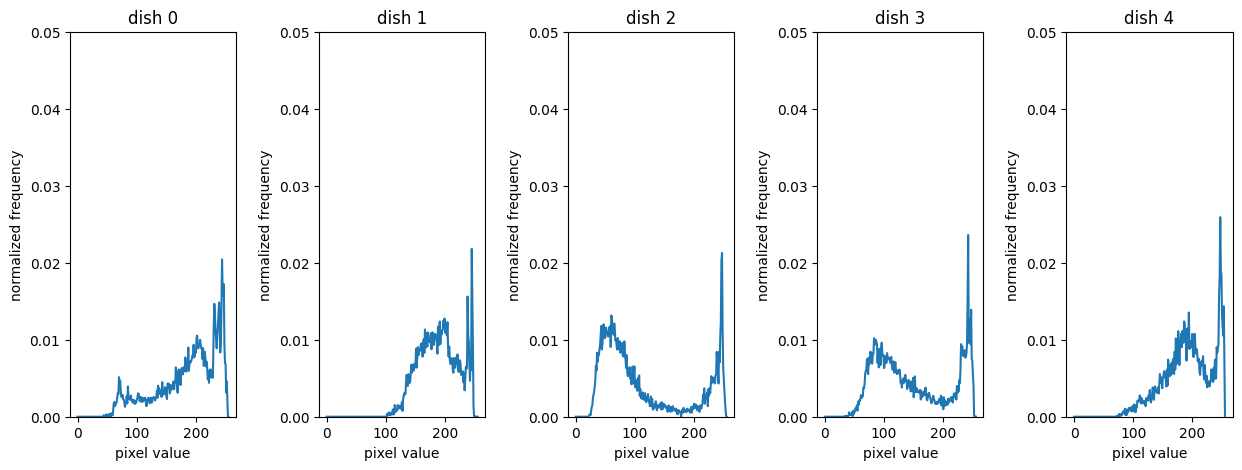

In [ ]:
# compute the color histograms of the gray-scaled images

def compute_gray_histogram(image):  
    hist = cv2.calcHist([image], [0], None, [256], [0, 1])
    hist /= hist.sum()
    return hist
# gray scale all the images
gray_images = []
for i in range(5):
    gray_images.append(cv2.cvtColor(images[i][0], cv2.COLOR_BGR2GRAY))
# compute the histograms
gray_hists = []
for i in range(5):
    gray_hists.append(compute_gray_histogram(gray_images[i]))
# plot the histograms on 1 row and the corresponding images on the next row

fig, ax = plt.subplots(1, 5, figsize=(15, 5))

# use sparse layout
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(5):
    ax[i].plot(gray_hists[i])
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('dish ' + str(i))
    ax[i].set_ylim([0, 0.05])
    # ax[1, i].imshow(gray_images[i], cmap='gray')
    # ax[1, i].axis('off')
    # ax[1, i].set_title('dish ' + str(i))
    
plt.show()

# fig, ax = plt.subplots(1, 5, figsize=(15, 5))
# for i in range(5):
#     ax[i].plot(gray_hists[i])
#     ax[i].set_xlabel('pixel value')
#     ax[i].set_ylabel('normalized frequency')
#     ax[i].set_title('dish ' + str(i))
# plt.show()



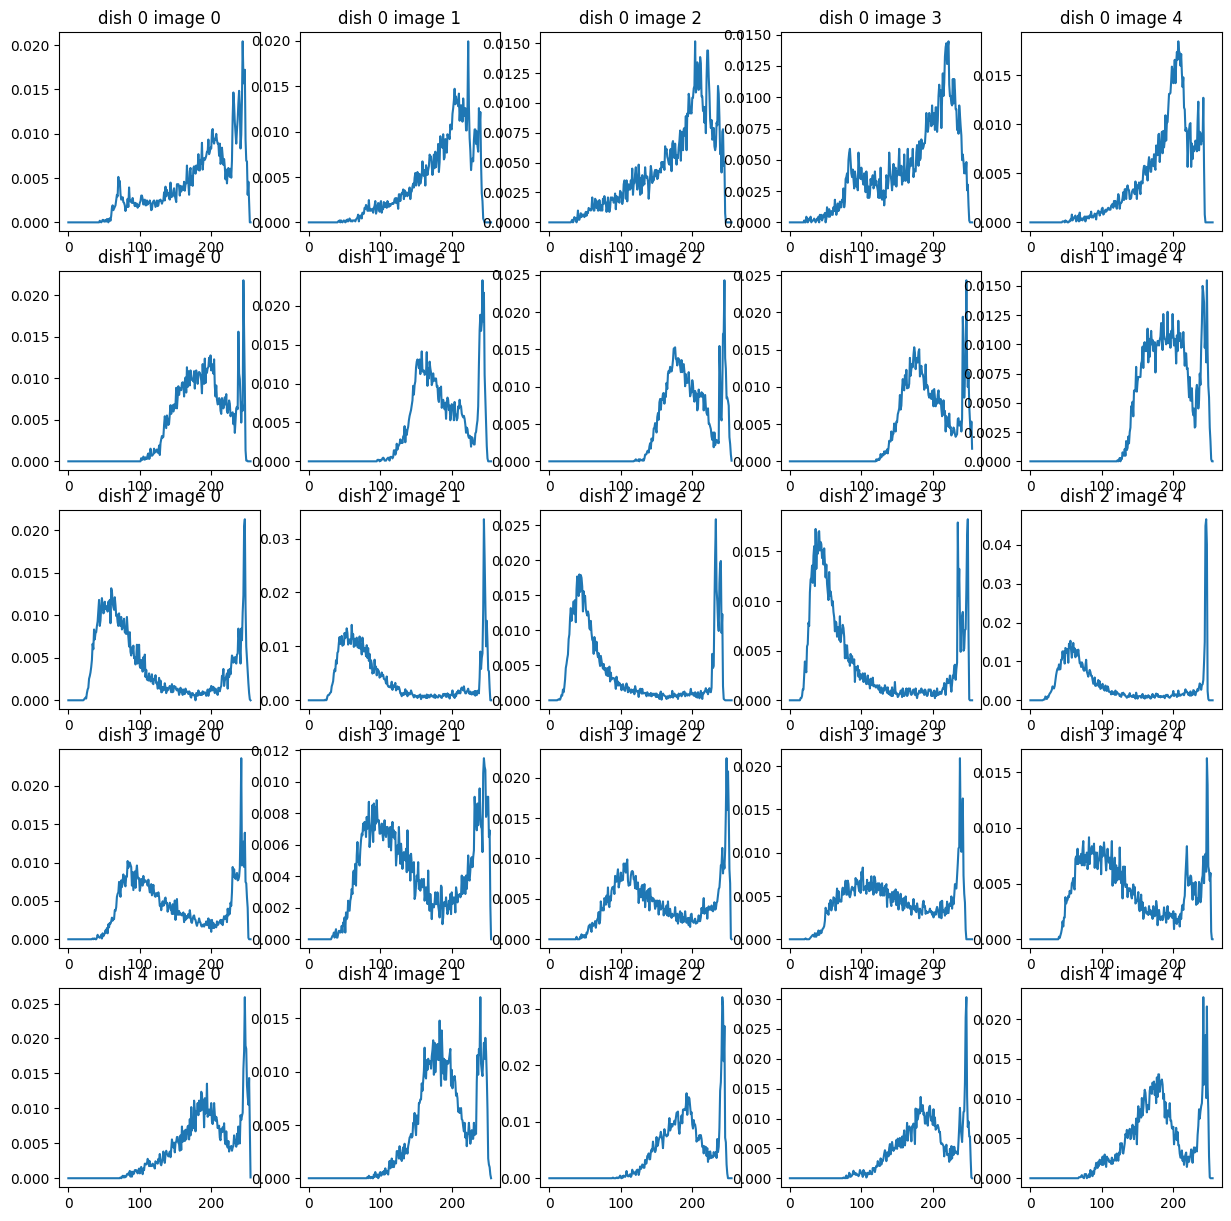

In [ ]:
#  compute th hisograms of all five cucumber images and plot them in the same figure


grayed_cumcumber_images = []    
grayed_tomato_images = []
grayed_purple_rice_images = []
grayed_little_greens_images = []
grayed_shrimp_ball_images = []


for i in range(5):
    grayed_cumcumber_images.append(cv2.cvtColor(images[0][i], cv2.COLOR_BGR2GRAY))
    grayed_tomato_images.append(cv2.cvtColor(images[1][i], cv2.COLOR_BGR2GRAY))
    grayed_purple_rice_images.append(cv2.cvtColor(images[2][i], cv2.COLOR_BGR2GRAY))
    grayed_little_greens_images.append(cv2.cvtColor(images[3][i], cv2.COLOR_BGR2GRAY))
    grayed_shrimp_ball_images.append(cv2.cvtColor(images[4][i], cv2.COLOR_BGR2GRAY))

cumcumber_hists = []
tomato_hists = []
purple_rice_hists = []
little_greens_hists = []
shrimp_ball_hists = []


for i in range(5):
    cumcumber_hists.append(compute_gray_histogram(grayed_cumcumber_images[i]))
    tomato_hists.append(compute_gray_histogram(grayed_tomato_images[i]))
    purple_rice_hists.append(compute_gray_histogram(grayed_purple_rice_images[i]))
    little_greens_hists.append(compute_gray_histogram(grayed_little_greens_images[i]))
    shrimp_ball_hists.append(compute_gray_histogram(grayed_shrimp_ball_images[i]))

all_hists = []
all_hists.append(cumcumber_hists)
all_hists.append(tomato_hists)
all_hists.append(purple_rice_hists)
all_hists.append(little_greens_hists)
all_hists.append(shrimp_ball_hists)


fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ax[i, j].plot(all_hists[i][j])  
        ax[i, j].axis('on')
        ax[i, j].set_title('dish ' + str(i) + ' image ' + str(j))
plt.show()


***we noticed that the histogrms for different dishes can be different, however, because we have reduced the RGB channel to only one channel, information is lost which also explains why dish1 histogram looks like dish4***

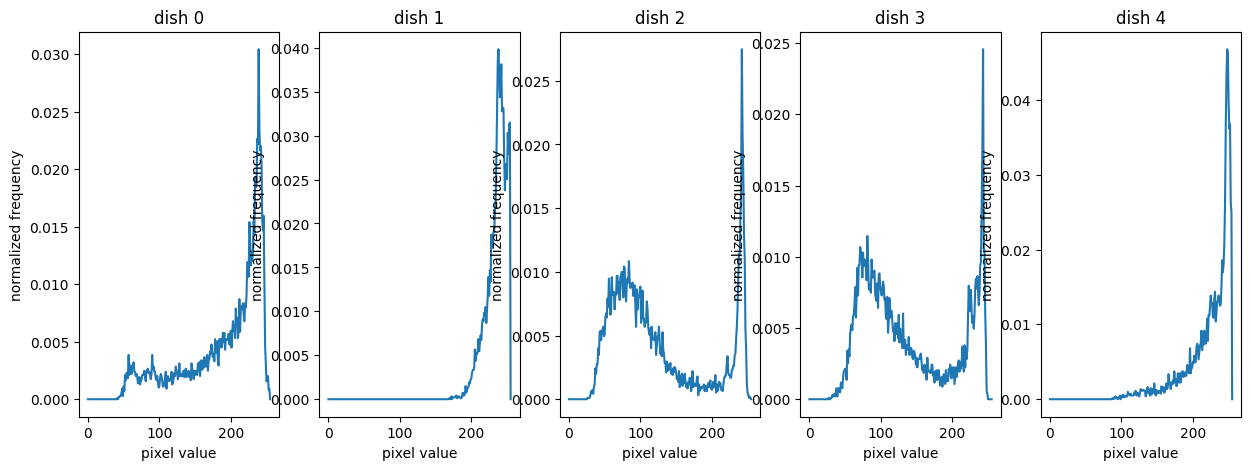

In [ ]:
# compute histogram of red channel of the color images, notice that it's BGR so R is index
def compute_red_histogram(image):
    hist = cv2.calcHist([image], [2], None, [256], [0, 1])
    hist /= hist.sum()
    return hist

red_hists = []
for i in range(5):
    red_hists.append(compute_red_histogram(images[i][0]))

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].plot(red_hists[i])
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('dish ' + str(i))
plt.show()


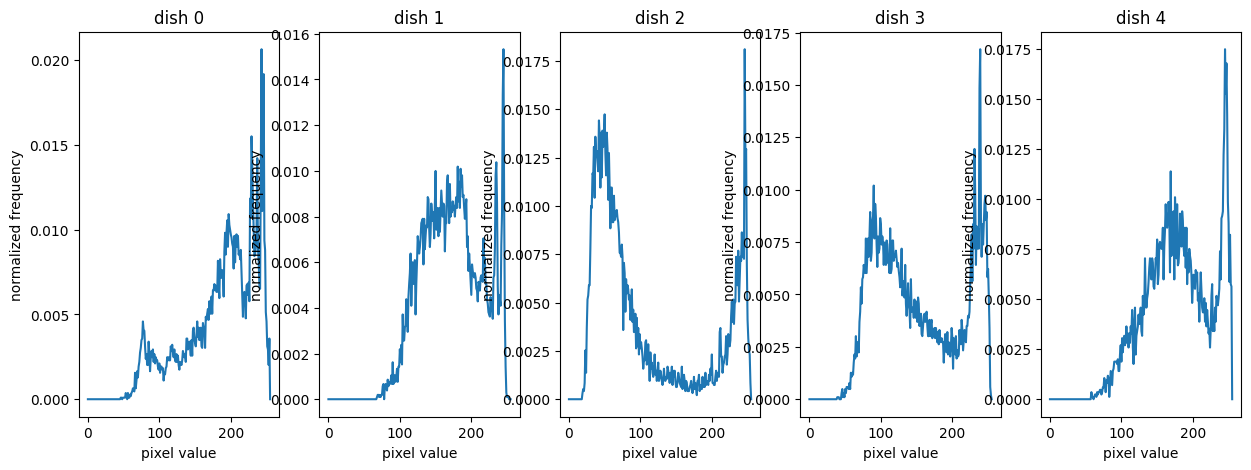

In [ ]:
# compute the histograms of the green channel of the color images
def compute_green_histogram(image):
    hist = cv2.calcHist([image], [1], None, [256], [0, 1])
    hist /= hist.sum()
    return hist

green_hists = []
for i in range(5):
    green_hists.append(compute_green_histogram(images[i][0]))
    
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].plot(green_hists[i])
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('dish ' + str(i))
plt.show()



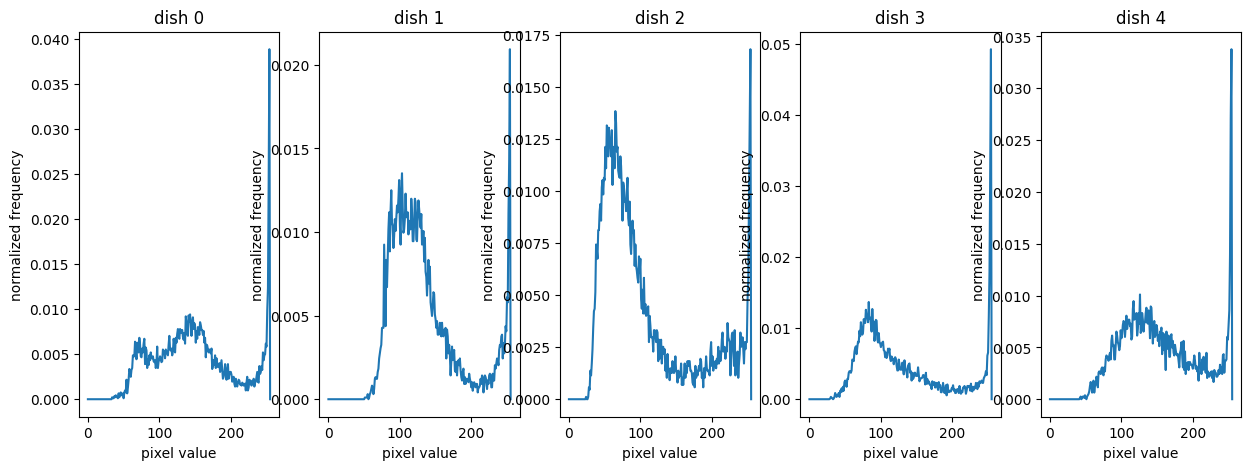

In [ ]:
# compute the histograms of the blue channel of the color images
def compute_blue_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 1])
    hist /= hist.sum()
    return hist

blue_hists = []
for i in range(5):
    blue_hists.append(compute_blue_histogram(images[i][0]))


fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].plot(blue_hists[i])
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('dish ' + str(i))
plt.show()
    

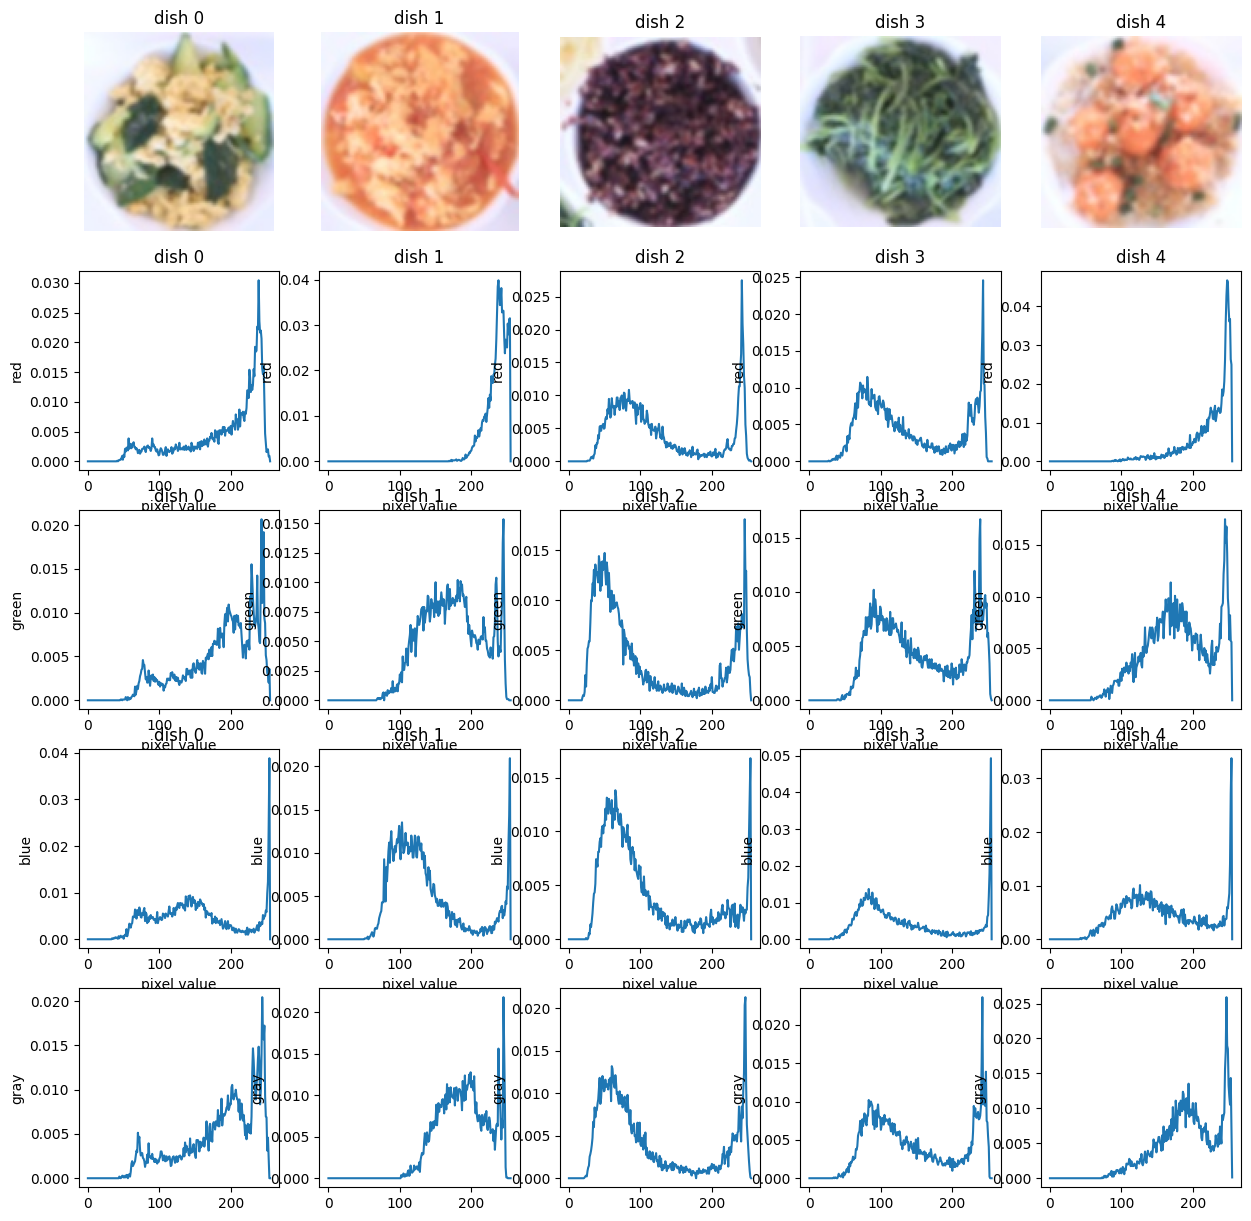

In [ ]:
# show first row the dishes, second row the red channel histograms, third row the green channel histograms, and fourth row the blue channel histograms, and fifth row the gray scale histograms
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    ax[0, i].imshow(cv2.cvtColor(images[i][0], cv2.COLOR_BGR2RGB))
    ax[0, i].axis('off')
    ax[0, i].set_title('dish ' + str(i))
    ax[1, i].plot(red_hists[i])
    ax[1, i].set_xlabel('pixel value')
    ax[1, i].set_ylabel('red')
    ax[1, i].set_title('dish ' + str(i))
    ax[2, i].plot(green_hists[i])
    ax[2, i].set_xlabel('pixel value')
    ax[2, i].set_ylabel('green')
    ax[2, i].set_title('dish ' + str(i))
    ax[3, i].plot(blue_hists[i])
    ax[3, i].set_xlabel('pixel value')
    ax[3, i].set_ylabel('blue')
    ax[3, i].set_title('dish ' + str(i))
    ax[4, i].plot(gray_hists[i])
    ax[4,i].set_ylabel('gray')
plt.show()


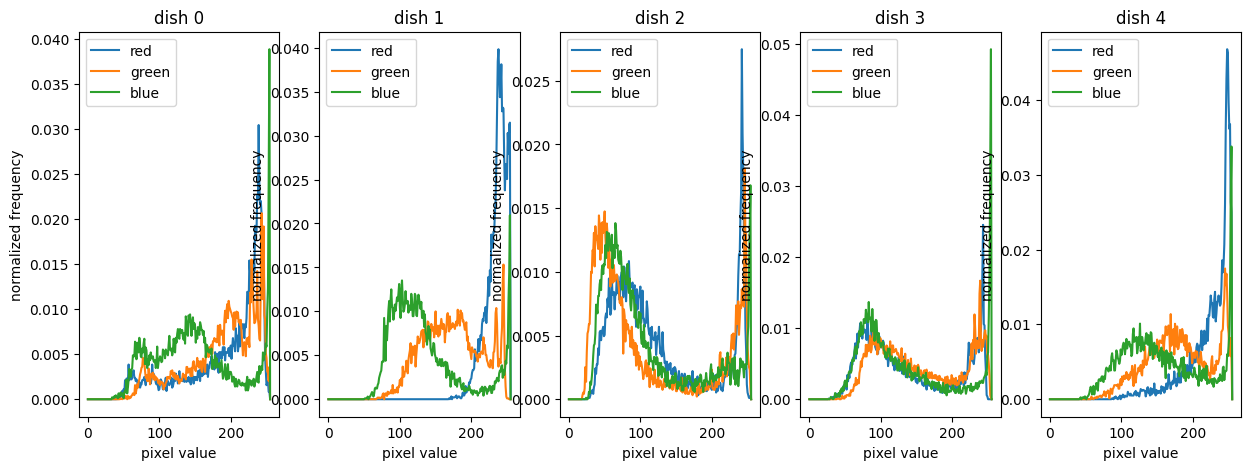

In [ ]:
# overlay the histograms of the red, green, and blue channels in the same plot
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].plot(red_hists[i], label='red')
    ax[i].plot(green_hists[i], label='green')
    ax[i].plot(blue_hists[i], label='blue')
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('dish ' + str(i))
    ax[i].legend()

plt.show()

***tried lbp, but it's not good***

/Users/taojing/miniconda3/envs/cs302/lib/python3.9/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


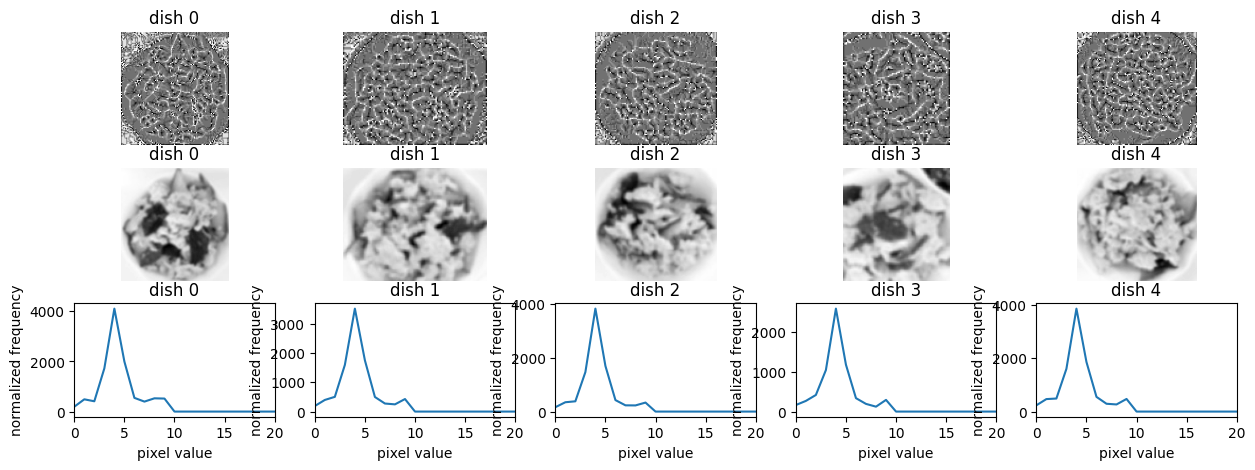

In [ ]:
# compute the local binary pattern for all cucumber images and plot them in the first row, plot the five gray scale images in the second row
from skimage.feature import local_binary_pattern    
def compute_lbp(image):
    lbp = local_binary_pattern(image, 8, 1, 'uniform')
    (hist,_) = np.histogram(lbp.ravel(), bins=np.arange(0, 60), range=(0, 59))
    return lbp,hist

    


lbp_cumcumber_images = []
lbp_hist_cumcumber_images = []
for i in range(5):
    lbp, hist = compute_lbp(grayed_cumcumber_images[i])
    lbp_cumcumber_images.append(lbp)
    lbp_hist_cumcumber_images.append(hist)



fig,ax = plt.subplots(3, 5, figsize=(15, 5))    
for i in range(5):
    ax[0, i].imshow(lbp_cumcumber_images[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title('dish ' + str(i))
    ax[1, i].imshow(grayed_cumcumber_images[i], cmap='gray')
    ax[1, i].axis('off')
    ax[1, i].set_title('dish ' + str(i))
    ax[2, i].plot(lbp_hist_cumcumber_images[i])
    ax[2, i].set_xlabel('pixel value')
    ax[2, i].set_ylabel('normalized frequency')
    ax[2, i].set_title('dish ' + str(i))
    # zoom in 
    ax[2, i].set_xlim([0, 20])


plt.show()


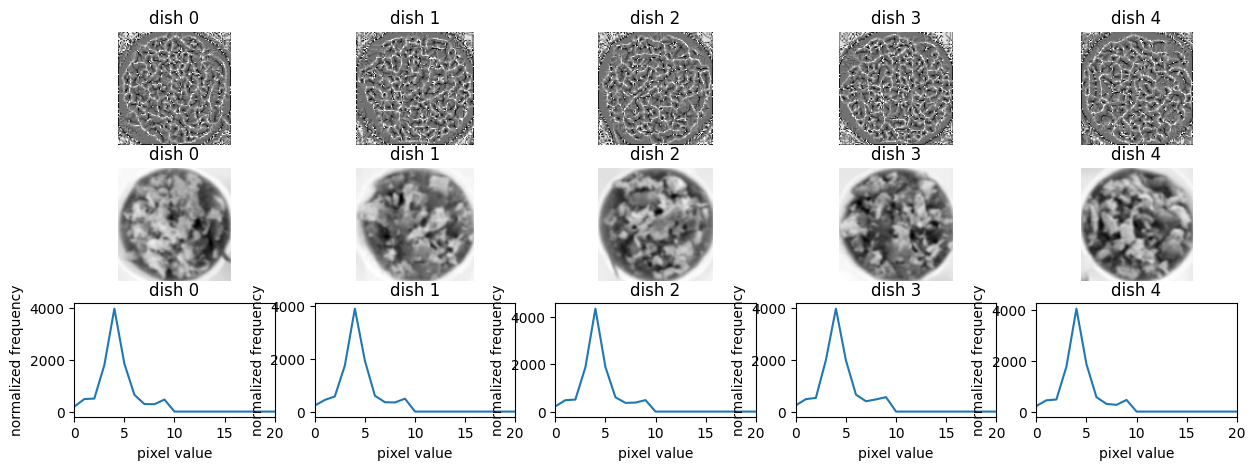

In [ ]:
# try gray scaled image of tomato
lbp_tomato_images = []
lbp_hist_tomato_images = []
for i in range(5):
    lbp, hist = compute_lbp(grayed_tomato_images[i])
    lbp_tomato_images.append(lbp)
    lbp_hist_tomato_images.append(hist)

fig,ax = plt.subplots(3, 5, figsize=(15, 5))
for i in range(5):
    ax[0, i].imshow(lbp_tomato_images[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title('dish ' + str(i))
    ax[1, i].imshow(grayed_tomato_images[i], cmap='gray')
    ax[1, i].axis('off')
    ax[1, i].set_title('dish ' + str(i))
    ax[2, i].plot(lbp_hist_tomato_images[i])
    ax[2, i].set_xlabel('pixel value')
    ax[2, i].set_ylabel('normalized frequency')
    ax[2, i].set_title('dish ' + str(i))
    # zoom in
    ax[2, i].set_xlim([0, 20])

plt.show()

***let's try uncompressed image***

5


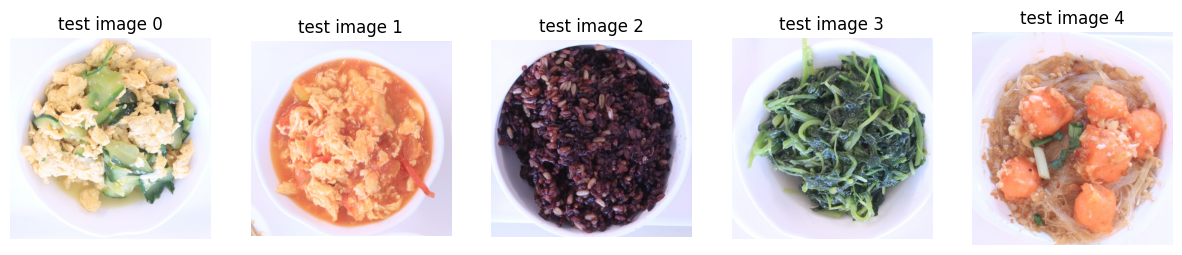

In [ ]:
# load images from test_original folder, convert them to float and rescale to 0-1
images = []

import glob

test_images = []
for i in range(5):
    test_image = cv2.imread(glob.glob('test_original/*')[i])
    test_images.append(test_image)
print(len(test_images)) 

# swap the first and second image
test_images[0], test_images[1] = test_images[1], test_images[0]

for i in range(5):
    test_images[i] = test_images[i].astype(np.float32) / 255.0

fig, ax = plt.subplots(1, 5, figsize=(15, 5))   

for i in range(5):
    ax[i].imshow(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB))
    ax[i].axis('off')
    ax[i].set_title('test image ' + str(i))
plt.show()

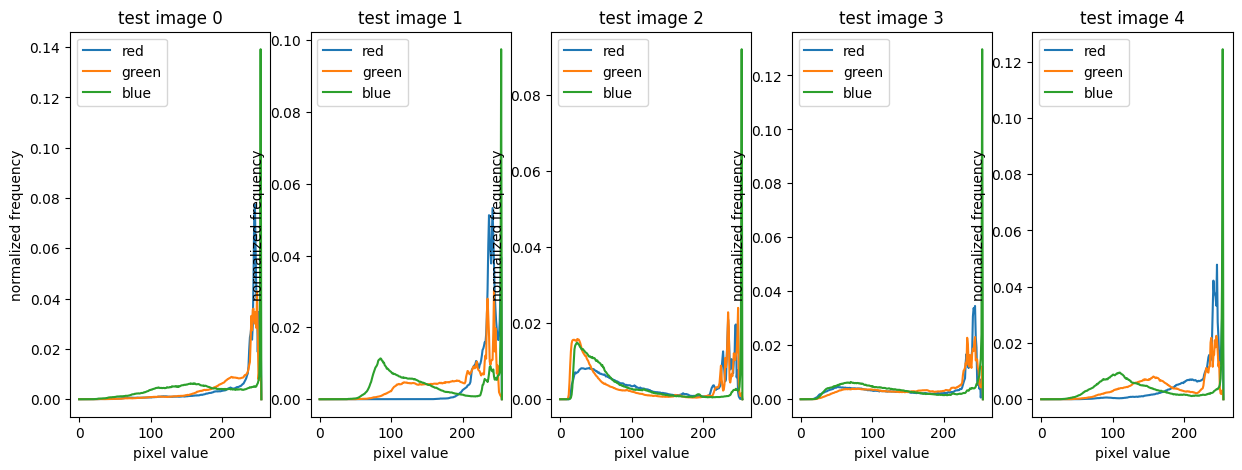

In [ ]:


# compute the histograms of the red, green, and blue channels of the test images
test_red_hists = []
test_green_hists = []
test_blue_hists = []
for i in range(5):
    test_red_hists.append(compute_red_histogram(test_images[i]))
    test_green_hists.append(compute_green_histogram(test_images[i]))
    test_blue_hists.append(compute_blue_histogram(test_images[i]))

# overlay the histograms of the red, green, and blue channels of the test images in the same plot
fig, ax = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    ax[i].plot(test_red_hists[i], label='red')
    ax[i].plot(test_green_hists[i], label='green')
    ax[i].plot(test_blue_hists[i], label='blue')
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('test image ' + str(i))
    ax[i].legend()

plt.show()


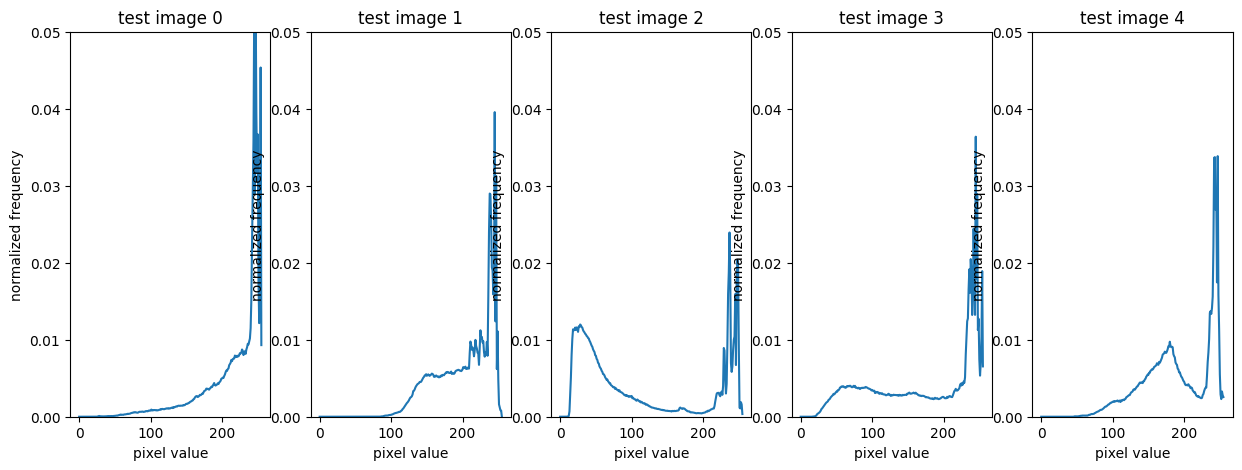

In [ ]:
# compute gray histograms of the test images
test_gray_images = []
for i in range(5):
    test_gray_images.append(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2GRAY))

test_gray_hists = []
for i in range(5):
    test_gray_hists.append(compute_gray_histogram(test_gray_images[i]))

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].plot(test_gray_hists[i])
    ax[i].set_xlabel('pixel value')
    ax[i].set_ylabel('normalized frequency')
    ax[i].set_title('test image ' + str(i))
    # y should be 0 -1 
    ax[i].set_ylim([0, 0.05])


plt.show()


[array([ 16653,  34309,  37699, 156383, 229858, 225537,  66018,  63545,
       371392,  55243,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0]), array([ 17307,  44427,  43051, 200969, 298940, 287291,  83500,  80957,
       377791,  71040,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,     

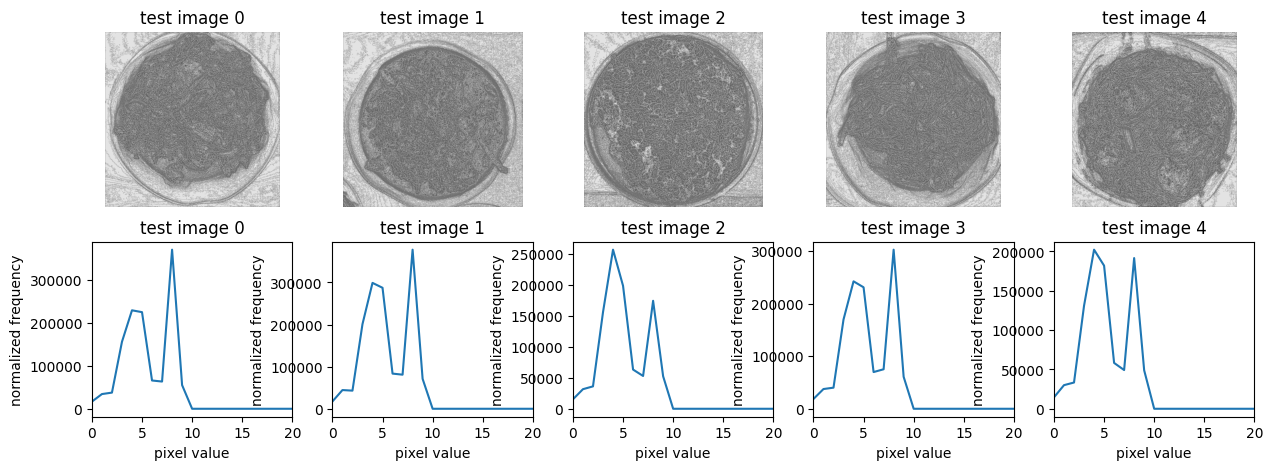

In [ ]:
# compute the local binary pattern for all test images and plot them in the first row, plot the five gray scale images in the second row
lbp_test_images = []
lbp_hist_test_images = []
for i in range(5):
    lbp, hist = compute_lbp(test_gray_images[i])
    lbp_test_images.append(lbp)
    lbp_hist_test_images.append(hist)
print(lbp_hist_test_images)

# plot the local binary pattern histograms
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    ax[0, i].imshow(lbp_test_images[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title('test image ' + str(i))
    ax[1, i].plot(lbp_hist_test_images[i])
    ax[1, i].set_xlabel('pixel value')
    ax[1, i].set_ylabel('normalized frequency')
    ax[1, i].set_title('test image ' + str(i))
    # 
    ax[1, i].set_xlim([0, 20])
   
plt.show()


In [4]:
import cv2
import numpy as np


In [25]:
tomato_egg = cv2.imread('/Users/taojing/Desktop/image_classification/images/segmented_dishes/tomato_egg/segmented_dish_9642_0.jpg')
# tomato = tomato_egg.astype(np.float32) / 255.0
sh_green = cv2.imread('/Users/taojing/Desktop/image_classification/images/segmented_dishes/shanghai_green/segmented_dish_8874_1.jpg')
# sh_green = sh_green.astype(np.float32) / 255.0
shrimp_ball = cv2.imread('images/segmented_dishes/shirmp_egg/segmented_dish_8894_2.jpg')
# shrimp_ball = shrimp_ball.astype(np.float32) / 255.0
purple_rice = cv2.imread('/Users/taojing/Desktop/image_classification/images/segmented_dishes/purple_rice/segmented_dish_8874_0.jpg')
# purple_rice = purple_rice.astype(np.float32) / 255.0
braised_pork = cv2.imread('/Users/taojing/Desktop/image_classification/images/training_set/hong_shao_rou/segmented_dish_8996_1.jpg')
# braised_pork = braised_pork.astype(np.float32)  / 255.0



In [14]:
import matplotlib.pyplot as plt 

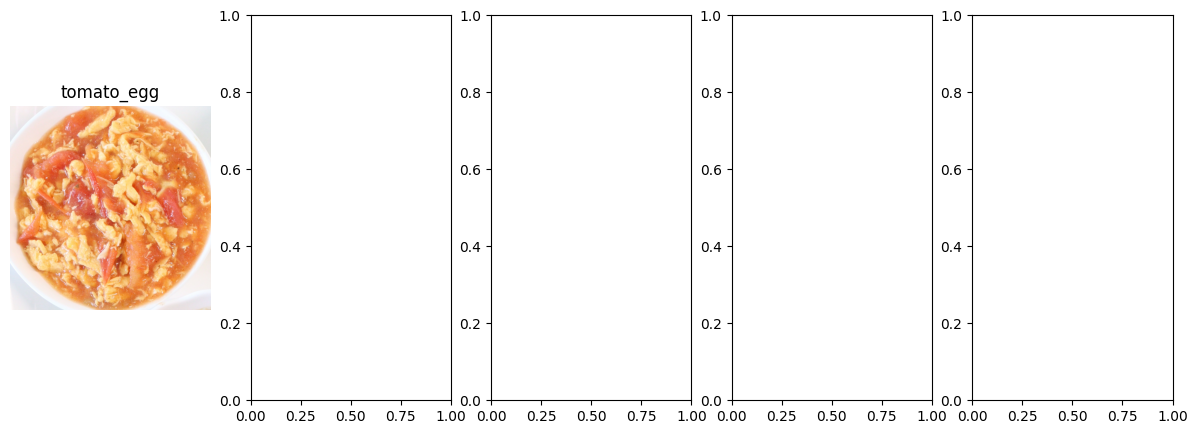

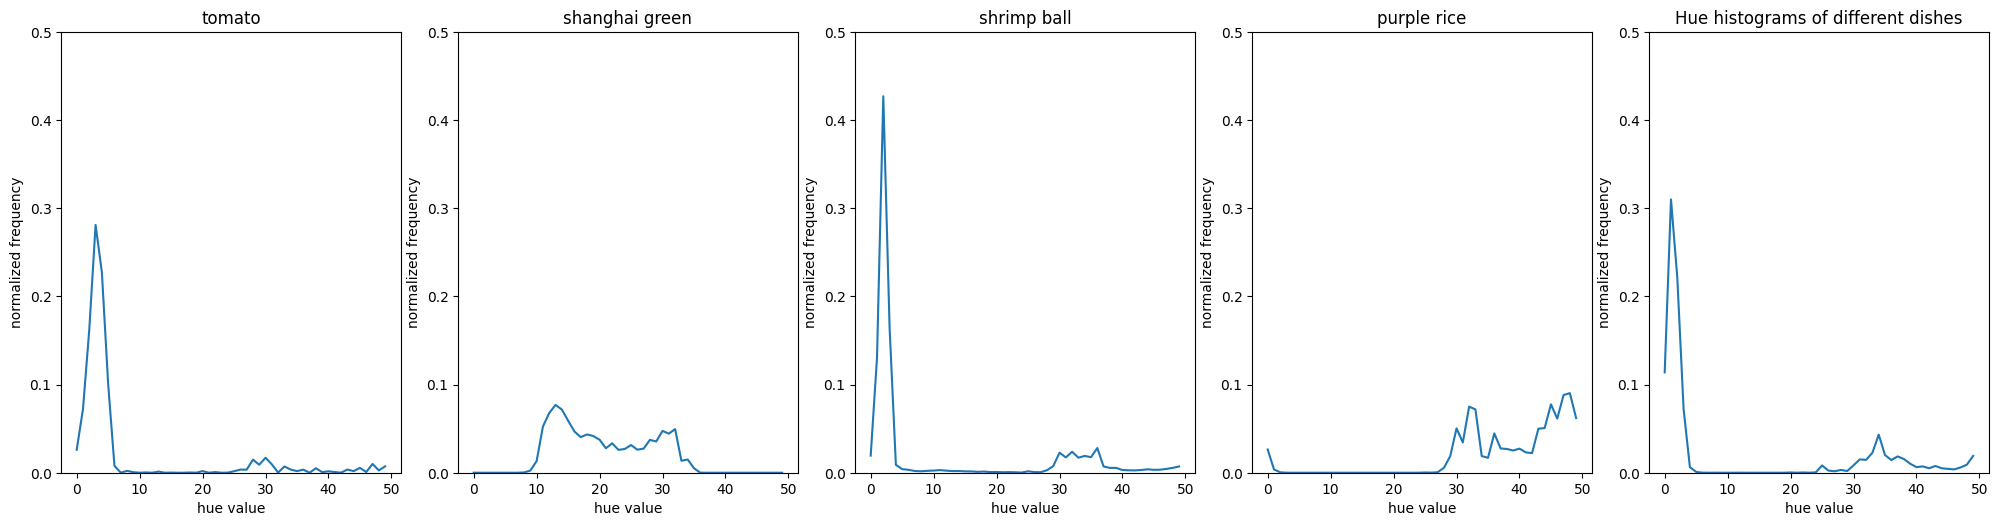

In [60]:
from skimage import color

# convert all images to rgb
tomato_rgb = cv2.cvtColor(tomato_egg, cv2.COLOR_BGR2RGB)
sh_green_rgb = cv2.cvtColor(sh_green, cv2.COLOR_BGR2RGB)
shrimp_ball_rgb = cv2.cvtColor(shrimp_ball, cv2.COLOR_BGR2RGB)
purple_rice_rgb = cv2.cvtColor(purple_rice, cv2.COLOR_BGR2RGB)
braised_pork_rgb = cv2.cvtColor(braised_pork, cv2.COLOR_BGR2RGB)
# convert to hsv
tomato_hsv = color.rgb2hsv(tomato_rgb)
sh_green_hsv = color.rgb2hsv(sh_green_rgb)
shrimp_ball_hsv = color.rgb2hsv(shrimp_ball_rgb)
purple_rice_hsv = color.rgb2hsv(purple_rice_rgb)
braised_pork_hsv = color.rgb2hsv(braised_pork_rgb)

# compute the histograms of the hue channel
def compute_hue_histogram(image):
    hist,_ = np.histogram(image[:,:,0].ravel(), bins=np.arange(0, 1.01, 0.02))
    # normalize the histogram
    hist = hist/hist.sum()
    return hist

tomato_hue_hist = compute_hue_histogram(tomato_hsv)
sh_green_hue_hist = compute_hue_histogram(sh_green_hsv)
shrimp_ball_hue_hist = compute_hue_histogram(shrimp_ball_hsv)
purple_rice_hue_hist = compute_hue_histogram(purple_rice_hsv)
braised_pork_hue_hist = compute_hue_histogram(braised_pork_hsv)

# plot all the hue histograms in the same plot
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
fig.tight_layout()
ax[0].plot(tomato_hue_hist)
ax[0].set_xlabel('hue value')
ax[0].set_ylabel('normalized frequency')
ax[0].set_title('tomato')
ax[0].set_ylim([0, 0.5])
ax[1].plot(sh_green_hue_hist) 
ax[1].set_xlabel('hue value')
ax[1].set_ylabel('normalized frequency')
ax[1].set_title('shanghai green')
ax[1].set_ylim([0, 0.5])
ax[2].plot(shrimp_ball_hue_hist)
ax[2].set_xlabel('hue value')
ax[2].set_ylabel('normalized frequency')
ax[2].set_title('shrimp ball')
ax[2].set_ylim([0, 0.5])
ax[3].plot(purple_rice_hue_hist)
ax[3].set_ylim([0, 0.5])
ax[3].set_xlabel('hue value')
ax[3].set_ylabel('normalized frequency')

ax[3].set_title('purple rice')
ax[4].plot(braised_pork_hue_hist)
ax[4].set_ylim([0, 0.5])
ax[4].set_xlabel('hue value')
ax[4].set_ylabel('normalized frequency')
ax[4].set_title('braised pork')

plt.show()






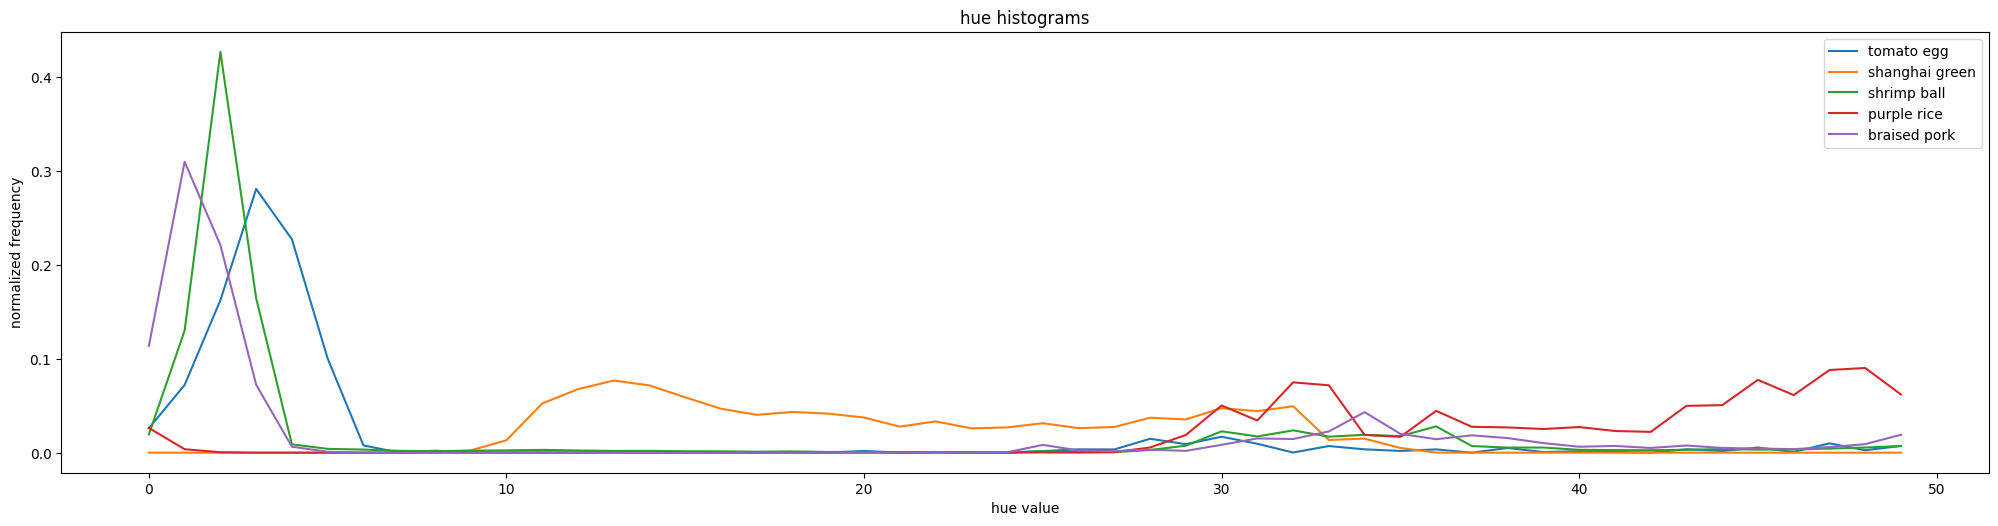

In [38]:
# show all five histograms in the same plot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
fig.tight_layout()
ax.plot(tomato_hue_hist, label='tomato egg')
ax.plot(sh_green_hue_hist, label='shanghai green')
ax.plot(shrimp_ball_hue_hist, label='shrimp ball')
ax.plot(purple_rice_hue_hist, label='purple rice')
ax.plot(braised_pork_hue_hist, label='braised pork')
ax.set_xlabel('hue value')
ax.set_ylabel('normalized frequency')
ax.set_title('hue histograms')
ax.legend()

plt.show()


In [48]:
# compute local binary pattern for all five images
from skimage.feature import local_binary_pattern    
def compute_lbp(image):
    lbp = local_binary_pattern(image, 8, 1, 'uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=50, range=(0, 59))
    return lbp, hist

tomato_lbp, tomato_lbp_hist = compute_lbp(cv2.cvtColor(tomato_egg, cv2.COLOR_BGR2GRAY))
sh_green_lbp, sh_green_lbp_hist = compute_lbp(cv2.cvtColor(sh_green, cv2.COLOR_BGR2GRAY))
shrimp_ball_lbp, shrimp_ball_lbp_hist = compute_lbp(cv2.cvtColor(shrimp_ball, cv2.COLOR_BGR2GRAY))
purple_rice_lbp, purple_rice_lbp_hist = compute_lbp(cv2.cvtColor(purple_rice, cv2.COLOR_BGR2GRAY))
braised_pork_lbp, braised_pork_lbp_hist = compute_lbp(cv2.cvtColor(braised_pork, cv2.COLOR_BGR2GRAY))



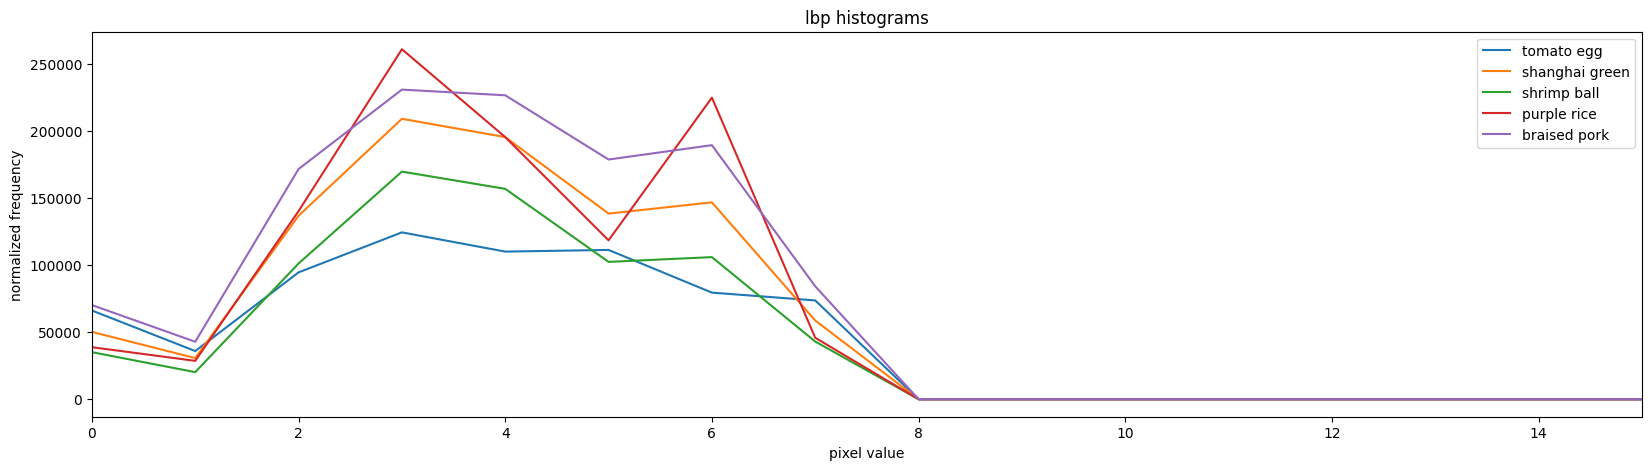

In [49]:
# plot lbp histograms in one figure
figure = plt.figure(figsize=(20, 5))
plt.plot(tomato_lbp_hist, label='tomato egg')
plt.plot(sh_green_lbp_hist, label='shanghai green')
plt.plot(shrimp_ball_lbp_hist, label='shrimp ball')
plt.plot(purple_rice_lbp_hist, label='purple rice')
plt.plot(braised_pork_lbp_hist, label='braised pork')
plt.xlabel('pixel value')
plt.ylabel('normalized frequency')
plt.title('lbp histograms')
plt.xlim([0, 15])
plt.legend()
plt.show()


In [51]:
# re-size the five images to the same size
tomato_egg_resized = cv2.resize(tomato_egg, (256, 256))
sh_green_resized = cv2.resize(sh_green, (256, 256))
shrimp_ball_resized = cv2.resize(shrimp_ball, (256, 256))
purple_rice_resized = cv2.resize(purple_rice, (256, 256))
braised_pork_resized = cv2.resize(braised_pork, (256, 256))


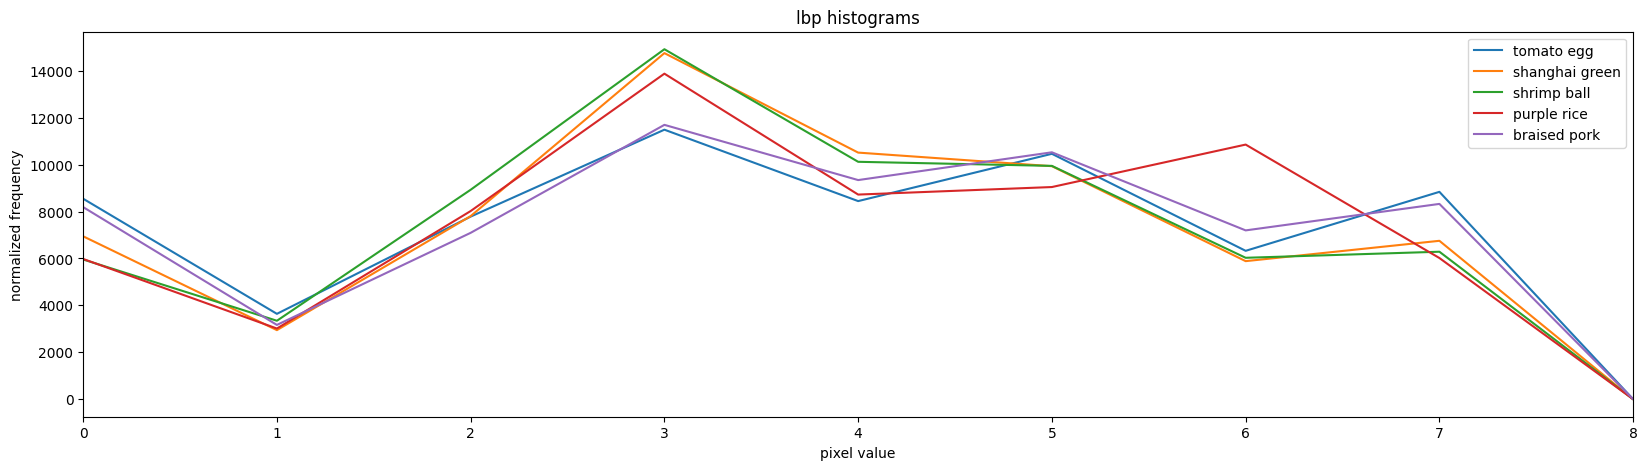

In [59]:
# compute and show lbp histogram
tomato_lbp_resized, tomato_lbp_hist_resized = compute_lbp(cv2.cvtColor(tomato_egg_resized, cv2.COLOR_BGR2GRAY))
sh_green_lbp_resized, sh_green_lbp_hist_resized = compute_lbp(cv2.cvtColor(sh_green_resized, cv2.COLOR_BGR2GRAY))
shrimp_ball_lbp_resized, shrimp_ball_lbp_hist_resized = compute_lbp(cv2.cvtColor(shrimp_ball_resized, cv2.COLOR_BGR2GRAY))
purple_rice_lbp_resized, purple_rice_lbp_hist_resized = compute_lbp(cv2.cvtColor(purple_rice_resized, cv2.COLOR_BGR2GRAY))
braised_pork_lbp_resized, braised_pork_lbp_hist_resized = compute_lbp(cv2.cvtColor(braised_pork_resized, cv2.COLOR_BGR2GRAY))

# plot lbp histograms in one figure
figure = plt.figure(figsize=(20, 5))
plt.plot(tomato_lbp_hist_resized, label='tomato egg')
plt.plot(sh_green_lbp_hist_resized, label='shanghai green')
plt.plot(shrimp_ball_lbp_hist_resized, label='shrimp ball')
plt.plot(purple_rice_lbp_hist_resized, label='purple rice')
plt.plot(braised_pork_lbp_hist_resized, label='braised pork')
plt.xlabel('pixel value')
plt.ylabel('normalized frequency')
plt.title('lbp histograms')
plt.xlim([0, 8])
plt.legend()
plt.show()



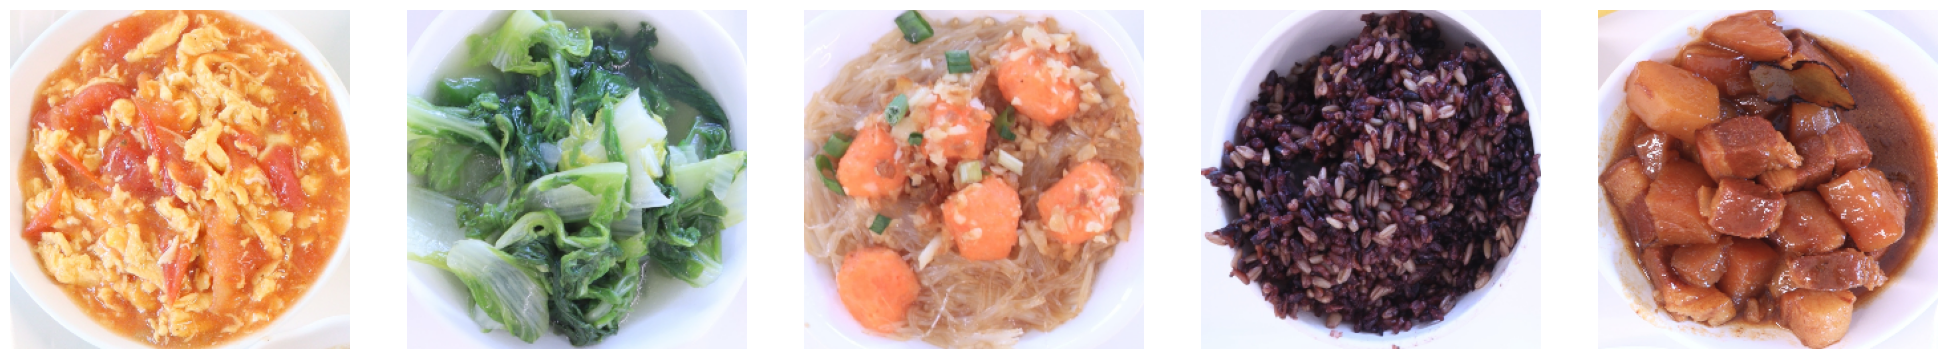

In [55]:
# plot the five images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(tomato_egg_resized, cv2.COLOR_BGR2RGB))

ax[1].imshow(cv2.cvtColor(sh_green_resized, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(shrimp_ball_resized, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(purple_rice_resized, cv2.COLOR_BGR2RGB))
ax[4].imshow(cv2.cvtColor(braised_pork_resized, cv2.COLOR_BGR2RGB))

for i in range(5):
    ax[i].axis('off')

plt.show()




In [37]:
print(purple_rice_hue_hist.shape)

(50,)


In [29]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 6])
c = np.concatenate((a, b))

In [30]:
print(c)

[1 2 3 4 5 1 2 3 4 6]


In [36]:
# stack a and b
d = np.stack((a, b))
print(d.shape)


(2, 5)
